In [18]:
#（一）数据选择与加载
# 提供了一个名为“超市销售数据集”的资源文件，该数据集包含了超过四十四万条真实销售数据。每一列数据均有明确的名称，方便用户进行数据分析和处理。

In [19]:
import pandas as pd
# 读取销售数据
df = pd.read_csv('sales_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [20]:
# 假设这里有一个包含产品信息的DataFrame
product_info = pd.DataFrame({
    'Product_ID': ['P00069042', 'P00248942'],
    'Product_Name': ['Product A', 'Product B']
})
# 使用pd.merge进行数据合并
df = pd.merge(df, product_info, on='Product_ID', how='left')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Name
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,Product A
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,Product B
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664,NaN
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196,NaN
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043,NaN
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172,NaN


In [21]:
# 按性别分组，统计购买金额的总和与平均值
gender_group = df.groupby('Gender').agg(
    total_purchase=('Purchase','sum'),
    average_purchase=('Purchase','mean')
).reset_index()
gender_group

,Gender,total_purchase,average_purchase
0,F,1164624021,8809.761349
1,M,3853044357,9504.771713


In [22]:
# 定义标准化函数
def standardize_purchase(purchase):
    return (purchase - purchase.mean()) / purchase.std()
# 按年龄分组，对购买金额进行标准化（transform操作）
df['standardized_purchase'] = df.groupby('Age')['Purchase'].transform(standardize_purchase)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Name,standardized_purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,Product A,-0.128471
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,Product B,1.221198
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,NaN,-1.501458
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,NaN,-1.573585
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,NaN,-0.300640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664,NaN,0.454481
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196,NaN,1.967462
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043,NaN,-0.272883
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172,NaN,-0.447844


In [23]:
# 创建透视表，以性别和年龄为索引，统计不同产品类别的购买数量
pivot_df = pd.pivot_table(df, index=['Gender', 'Age'], columns='Product_Category_1',
                          values='Purchase', aggfunc='count', fill_value=0).reset_index()
pivot_df

Product_Category_1,Gender,Age,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,F,0-17,759,362,497,381,1492,88,8,847,5,29,236,80,34,23,42,60,2,8
1,F,18-25,4579,1135,1484,771,7809,760,100,5112,12,118,1034,214,202,92,168,414,8,45
2,F,26-35,9202,1815,1863,1132,16261,1715,388,12446,23,355,1643,401,481,229,353,933,5,103
3,F,36-45,5164,1181,1153,686,7671,953,216,6466,17,276,989,346,342,127,226,500,23,84
4,F,46-50,2449,512,440,308,3680,434,101,3505,6,134,440,197,156,56,117,245,8,68
5,F,51-55,1575,390,293,206,2932,348,81,2819,5,128,227,149,142,63,79,156,7,34
6,F,55+,673,178,144,88,1354,177,34,1752,2,98,90,110,71,23,38,55,8,34
7,M,0-17,2765,427,683,363,2788,304,43,1366,11,79,492,40,74,14,116,166,4,19
8,M,18-25,22048,3213,3149,1665,20348,2951,374,12553,49,478,3515,221,546,136,842,1165,33,291
9,M,26-35,48196,6969,5661,2992,44226,6629,1242,31087,128,1402,8092,671,1574,324,1988,3123,120,918


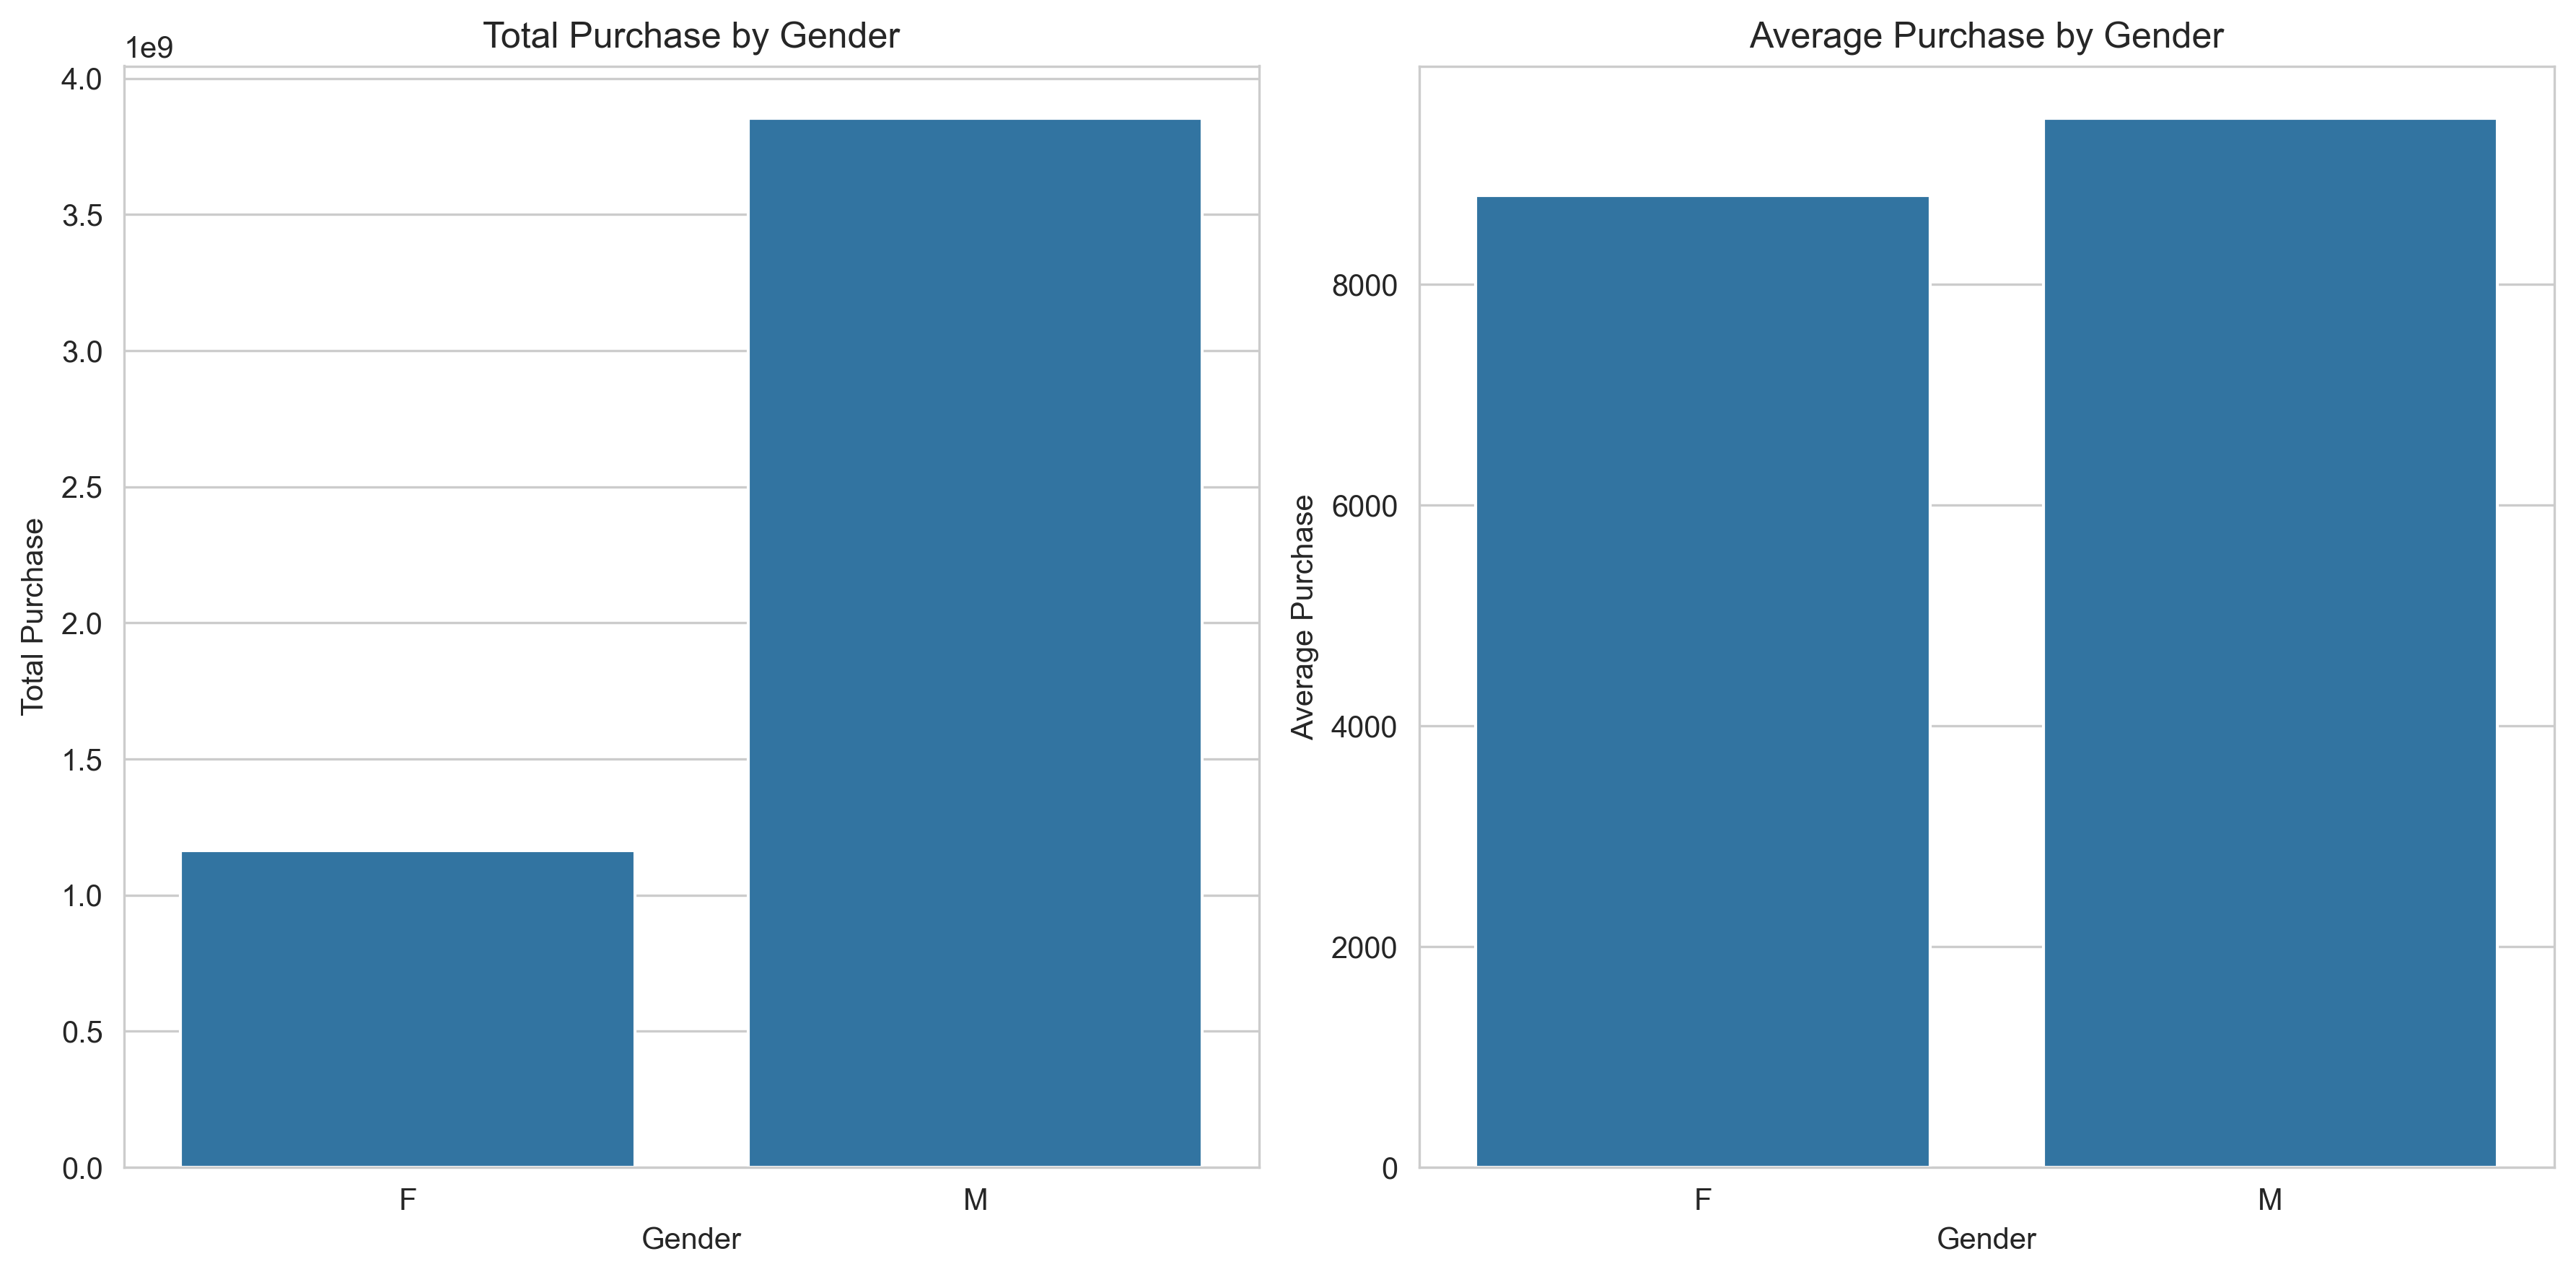

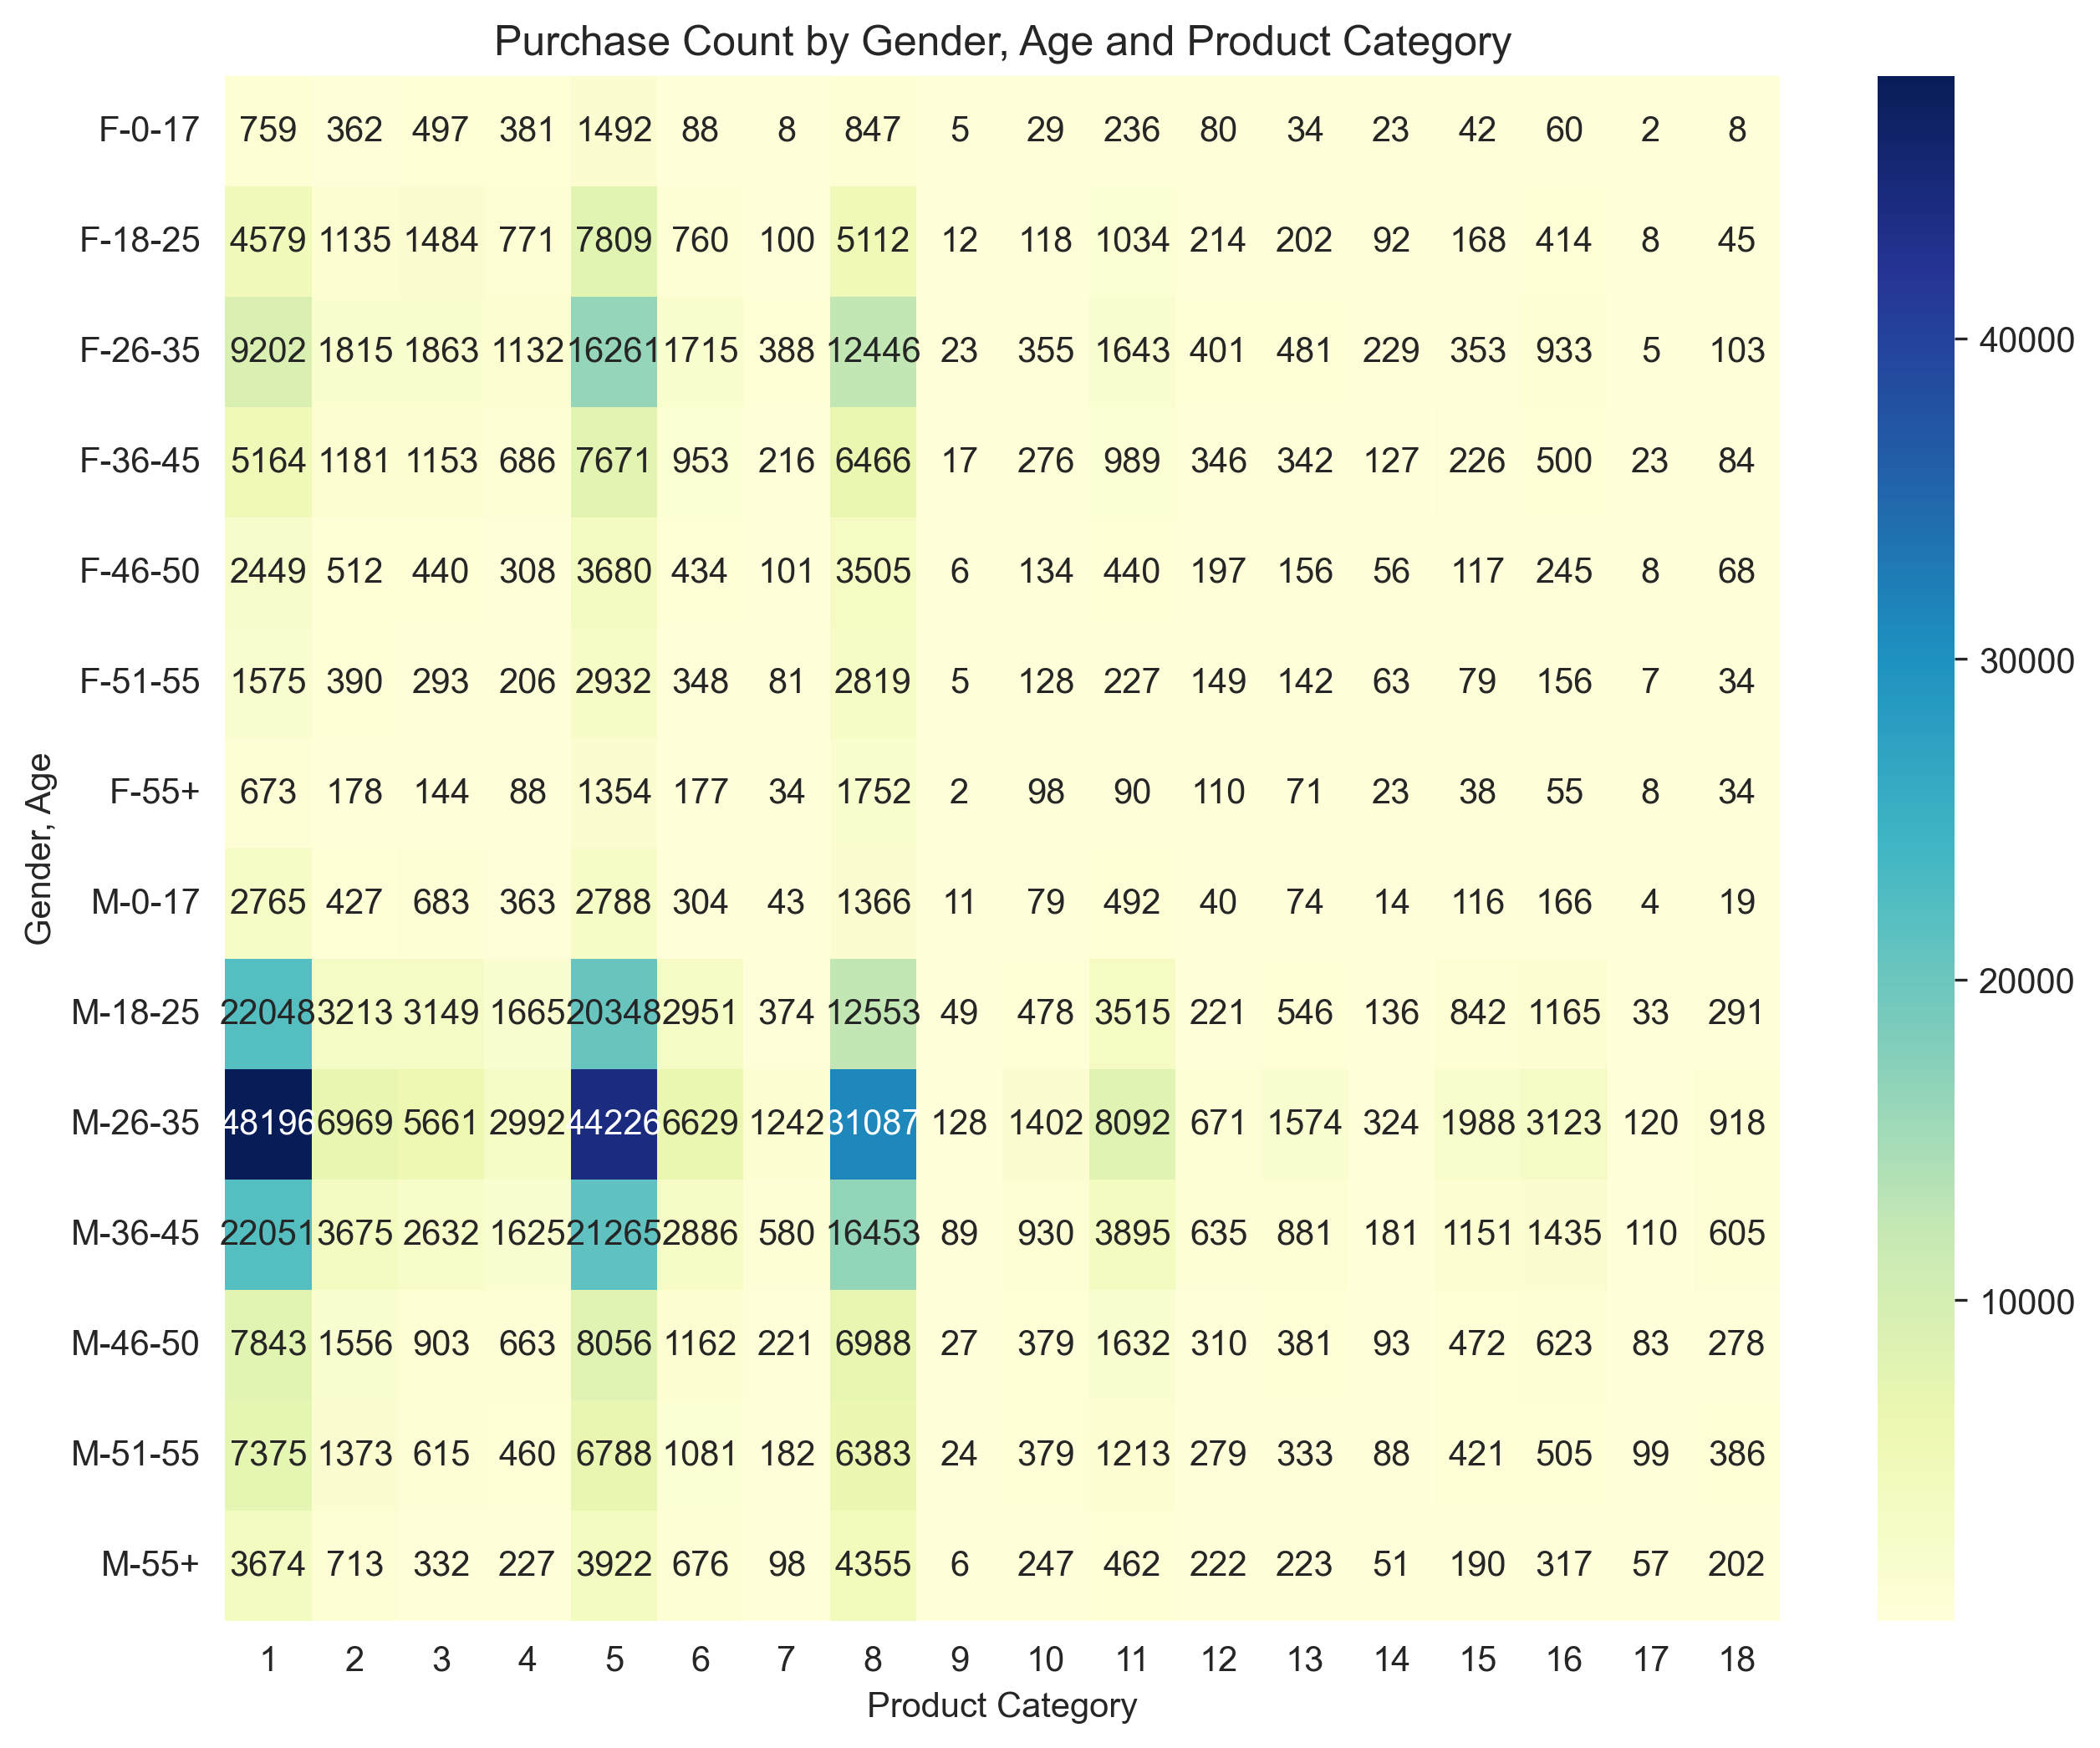

按性别分组的聚合结果已保存为 gender_group_aggregation.csv
按性别和年龄分组的透视表结果已保存为 pivot_df_aggregation.csv


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 假设 gender_group 和 pivot_df 已经在前面定义
# 可视化按性别分组的购买金额总和与平均值
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制购买金额总和柱状图
sns.barplot(x='Gender', y='total_purchase', data=gender_group, ax=axes[0])
axes[0].set_title('Total Purchase by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Purchase')

# 绘制购买金额平均值柱状图
sns.barplot(x='Gender', y='average_purchase', data=gender_group, ax=axes[1])
axes[1].set_title('Average Purchase by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Purchase')

plt.tight_layout()
plt.show()

# 可视化按性别和年龄分组的产品类别购买数量透视表（热力图）
pivot_melted = pd.melt(pivot_df, id_vars=['Gender', 'Age'], var_name='Product_Category_1', value_name='Purchase_Count')
heatmap_data = pivot_melted.pivot_table(index=['Gender', 'Age'], columns='Product_Category_1', values='Purchase_Count')

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Purchase Count by Gender, Age and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender, Age')
plt.show()

# 将聚合结果保存为 CSV 文件
try:
    gender_group.to_csv('gender_group_aggregation.csv', index=False)
    print("按性别分组的聚合结果已保存为 gender_group_aggregation.csv")
    pivot_df.to_csv('pivot_df_aggregation.csv', index=False)
    print("按性别和年龄分组的透视表结果已保存为 pivot_df_aggregation.csv")
except Exception as e:
    print(f"保存文件时出现错误: {e}")
